In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
df['datetime']

0         2011-01-01 0:00
1         2011-01-01 1:00
2         2011-01-01 2:00
3         2011-01-01 3:00
4         2011-01-01 4:00
               ...       
10881    2012-12-19 19:00
10882    2012-12-19 20:00
10883    2012-12-19 21:00
10884    2012-12-19 22:00
10885    2012-12-19 23:00
Name: datetime, Length: 10886, dtype: object

In [14]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [16]:
df['year'] = df['datetime'].apply(lambda x: x.year)
df['month'] = df['datetime'].apply(lambda x: x.month)
df['day'] = df['datetime'].apply(lambda x: x.day)
df['hour'] = df['datetime'].apply(lambda x: x.hour)

In [17]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [19]:
df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)

In [20]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [68]:
y = df['count']
x = df.drop('count', axis=1)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

In [25]:
from sklearn.linear_model import LinearRegression
lr  =LinearRegression()

In [26]:
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
preds = lr.predict(x_test)

In [29]:
lr.score(x_test, y_test)  # r-square

0.40629135307547415

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
mean_squared_error(y_test, preds)

20549.567711262287

In [34]:
np.sqrt(mean_squared_error(y_test, preds))

143.35120408026674

In [35]:
mean_absolute_error(y_test, preds)

107.72330243220566

In [44]:
np.mean(y)

191.57413191254824

In [ ]:
# 숫자형식이지만 실질적으로 category data : 'season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour'
# one hot 형식으로 변환 => get_dummies()

In [37]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [45]:
x_oh = pd.get_dummies(x,  columns=['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour'])
x_oh.head()

,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,14.395,81,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_oh,y, test_size=0.2, random_state=111)
lr  =LinearRegression()
lr.fit(x_train, y_train)
preds = lr.predict(x_test)
r_square = lr.score(x_test, y_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)

print('r_square :', r_square, 'mse :', mse, 'rmse :', rmse, 'mae :', mae)

r_square : 0.7170780747101179 mse : 9792.552779653566 rmse : 98.95732807454719 mae : 73.55269210156878


In [96]:
diffs = abs(preds - y_test).values
diffs

array([ 94.79896545,  72.95005798,  35.5557251 , ..., 179.07020569,
       164.33276367,  12.15861511])

In [104]:
np.sum(diffs)/len(preds)

73.55269210156878

In [105]:
np.sum(diffs)/np.sqrt(len(preds))

3432.634085730003

In [100]:
np.sqrt(np.sum((preds - y_test)**2)/len(preds))

98.95732807454719

In [103]:
np.sqrt(np.sum((preds - y_test)**2))/len(preds)

2.120405991806492

In [55]:
sorted(diffs, reverse=True)

[434.3928527832031,
 392.3689727783203,
 392.0243377685547,
 383.88739013671875,
 375.80625915527344,
 374.6824188232422,
 353.9665985107422,
 349.5880584716797,
 348.0017852783203,
 344.52117919921875,
 341.68321228027344,
 340.7180480957031,
 339.2248840332031,
 334.3506774902344,
 332.0889892578125,
 330.90562438964844,
 330.0191192626953,
 329.8567352294922,
 328.99534606933594,
 319.59837341308594,
 318.07781982421875,
 314.1111297607422,
 313.2730255126953,
 306.5268249511719,
 304.37074279785156,
 301.8232421875,
 300.5321350097656,
 300.2076873779297,
 298.9709930419922,
 296.6723175048828,
 296.64820861816406,
 294.031494140625,
 293.5338592529297,
 291.25535583496094,
 289.7592468261719,
 289.2514190673828,
 287.23451232910156,
 284.6127166748047,
 284.50563049316406,
 282.66807556152344,
 281.66717529296875,
 281.00901794433594,
 276.9407653808594,
 275.5145721435547,
 270.06993103027344,
 269.8034362792969,
 267.9060821533203,
 267.69175720214844,
 267.2494659423828,
 265.5

(array([855., 669., 342., 135.,  61.,  56.,  35.,  16.,   6.,   3.]),
 array([3.08227539e-02, 4.34670258e+01, 8.69032288e+01, 1.30339432e+02,
        1.73775635e+02, 2.17211838e+02, 2.60648041e+02, 3.04084244e+02,
        3.47520447e+02, 3.90956650e+02, 4.34392853e+02]),
 <a list of 10 Patch objects>)

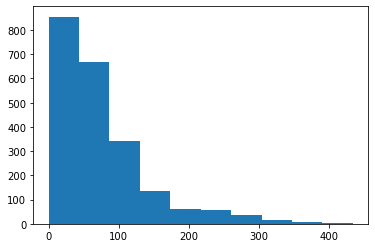

In [56]:
plt.hist(diffs)

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

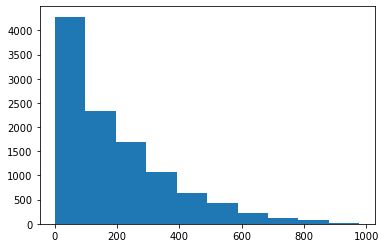

In [59]:
plt.hist(y)

(array([ 237.,  462.,  625.,  626.,  805., 1076., 1768., 2544., 2058.,
         685.]),
 array([0.69314718, 1.31238343, 1.93161968, 2.55085593, 3.17009218,
        3.78932843, 4.40856467, 5.02780092, 5.64703717, 6.26627342,
        6.88550967]),
 <a list of 10 Patch objects>)

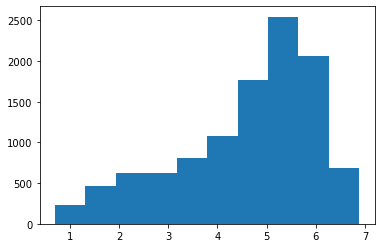

In [66]:
# y값이 분포가 쏠려 => y값에 대한 log변환 => 평탄화효화
plt.hist(np.log1p(y))

In [69]:
log_y = np.log1p(y)

In [70]:
np.expm1(log_y)

0         16.0
1         40.0
2         32.0
3         13.0
4          1.0
         ...  
10881    336.0
10882    241.0
10883    168.0
10884    129.0
10885     88.0
Name: count, Length: 10886, dtype: float64

In [73]:

x_train, x_test, y_train, y_test = train_test_split(x_oh, log_y, test_size=0.2, random_state=111)
lr  =LinearRegression()
lr.fit(x_train, y_train)
preds = lr.predict(x_test)
preds = np.expm1(preds)
# r_square = lr.score(x_test, y_test)
mse = mean_squared_error(np.expm1(y_test), preds)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), preds))
mae = mean_absolute_error(np.expm1(y_test), preds)

print('mse :', mse, 'rmse :', rmse, 'mae :', mae)

mse : 8912.969249932528 rmse : 94.40852318478734 mae : 61.39106560033411


In [82]:
def get_model_predict(model):
    x_train, x_test, y_train, y_test = train_test_split(x_oh, log_y, test_size=0.2, random_state=111)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    preds = np.expm1(preds)
    # r_square = lr.score(x_test, y_test)
    mse = mean_squared_error(np.expm1(y_test), preds)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test), preds))
    mae = mean_absolute_error(np.expm1(y_test), preds)
    print('mse :', mse, 'rmse :', rmse, 'mae :', mae)

In [83]:
from sklearn.linear_model import Ridge, Lasso

In [84]:
lr = LinearRegression()
rd = Ridge()
ls = Lasso()

models = [lr, rd, ls]

In [86]:
for m in models:
    print(m.__class__.__name__)
    get_model_predict(m)
    print('-------------------------')

LinearRegression
mse : 8912.969249932528 rmse : 94.40852318478734 mae : 61.39106560033411
-------------------------
Ridge
mse : 8937.9930180502 rmse : 94.54095947286658 mae : 61.456959638483035
-------------------------
Lasso
mse : 32853.89724617203 rmse : 181.25644056466527 mae : 123.90294659376944
-------------------------


In [87]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [89]:
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

In [90]:
models = [rf_reg, gbm_reg, xgb_reg, lgbm_reg]

for m in models:
    print(m.__class__.__name__)
    get_model_predict(m)
    print('-------------------------')

RandomForestRegressor
mse : 2324.8363636087292 rmse : 48.216556944774986 mae : 29.65363815159897
-------------------------
GradientBoostingRegressor
mse : 2397.727009741987 rmse : 48.96659075065352 mae : 30.8578772557155
-------------------------
XGBRegressor
mse : 2509.0395541240114 rmse : 50.09031397509913 mae : 30.201598331619557
-------------------------
LGBMRegressor
mse : 2181.5095252960305 rmse : 46.70663256215364 mae : 28.094480288533447
-------------------------
